In [1]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
%matplotlib inline
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist # computing the distance
from scipy.cluster.hierarchy import inconsistent
from scipy.cluster.hierarchy import fcluster
from pyclustertend import hopkins
from utils import Standard_Scaler_Preprocess, Cluster

done


In [2]:
# Import Principle Components
data = pd.read_csv('Data/PCA_data.csv')
print(data.shape)
data.head()

(388, 9)


,PC1,PC2,PC3,PC4,PC5,PC6,PLAYER,TEAM,POSITION
0,-4.031557,13.412326,-3.632878,1.631335,-1.885437,-3.810644,James Harden,HOU,G
1,-4.056028,9.452138,2.918992,-0.759261,-1.869097,-0.458240,Paul George,OKC,F
2,3.229130,10.224854,-0.194595,-2.957345,-1.885142,-3.187067,Giannis Antetokounmpo,MIL,F
3,7.744786,10.630323,1.505087,2.989003,-0.376304,1.170620,Joel Embiid,PHI,F-C
4,-1.401341,9.265636,-1.950025,-0.275184,-1.594073,-3.498045,LeBron James,LAL,F


In [3]:
# Standardize Principle Components
data_scaled = Standard_Scaler_Preprocess(data)
data_scaled.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PLAYER,TEAM,POSITION
0,-0.885136,3.422465,-1.621294,0.948575,-1.099479,-2.343132,James Harden,HOU,G
1,-0.890508,2.411931,1.302698,-0.441489,-1.089950,-0.281768,Paul George,OKC,F
2,0.708961,2.609108,-0.086844,-1.719613,-1.099307,-1.959700,Giannis Antetokounmpo,MIL,F
3,1.700382,2.712573,0.671696,1.738021,-0.219439,0.719804,Joel Embiid,PHI,F-C
4,-0.307667,2.364341,-0.870264,-0.160012,-0.929572,-2.150918,LeBron James,LAL,F


In [4]:
# Check if Pcs Standardized
data_scaled.describe().round(1)

,PC1,PC2,PC3,PC4,PC5,PC6
count,388.0,388.0,388.0,388.0,388.0,388.0
mean,0.0,0.0,0.0,0.0,0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0
min,-1.4,-2.0,-2.3,-2.7,-2.7,-2.5
25%,-0.8,-0.8,-0.8,-0.6,-0.7,-0.6
50%,-0.3,-0.1,0.1,0.0,-0.1,0.0
75%,0.6,0.7,0.7,0.6,0.7,0.6
max,3.1,3.4,2.7,3.3,3.8,3.2


In [5]:
# Create a DataFrame only for numeric features
num_data_scaled = data_scaled.drop(['PLAYER', 'POSITION', 'TEAM'], axis = 1)
num_data_scaled.columns

Index(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'], dtype='object')

In [6]:
# Conduct Hopkins Test
hopkins(num_data_scaled, num_data_scaled.shape[0])

0.3022763643219878

# Complete Linkage

0.4388850986659291


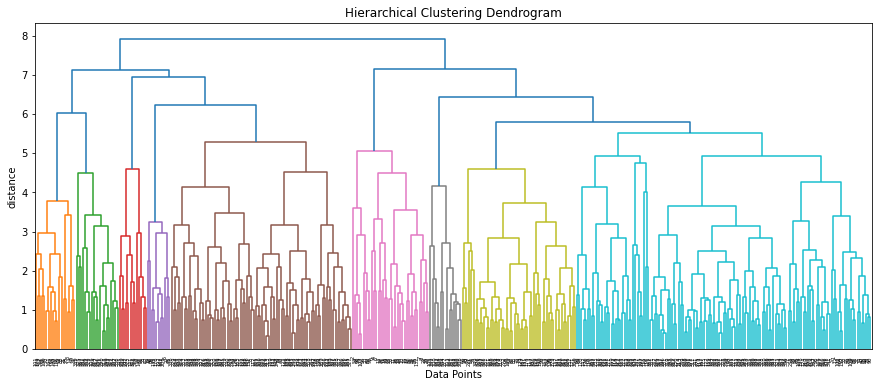

In [7]:
complete = Cluster(num_data_scaled, 'complete')
print(complete.cophenet_value())
complete.dendrogram_plot()

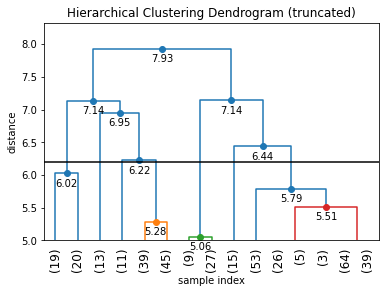

In [8]:
complete.dendrogram_truncated(15, 5, 6.2)

In [9]:
complete.inconsistency()

array([[3.02396436, 0.96459915, 7.        , 1.6344874 ],
       [3.18327973, 1.13846406, 5.        , 1.37923814],
       [3.72744475, 0.9928232 , 7.        , 1.21566369],
       [3.65721089, 0.71323213, 7.        , 1.79181428],
       [3.83030684, 0.79414248, 6.        , 1.54430736],
       [3.8465151 , 0.83126832, 7.        , 1.72766685],
       [4.6021476 , 0.61688582, 7.        , 1.47800427],
       [4.60135411, 1.06633746, 7.        , 1.11156625],
       [3.78624376, 1.18809138, 7.        , 1.88299104],
       [4.09530604, 1.38256676, 7.        , 1.53962951],
       [4.55000818, 1.48357458, 7.        , 1.27292288],
       [4.59454979, 1.634431  , 7.        , 1.44309537],
       [5.60303961, 1.30759764, 7.        , 1.17289098],
       [5.2415626 , 1.27583471, 7.        , 1.4889885 ],
       [6.66833855, 0.92902874, 7.        , 1.356542  ]])

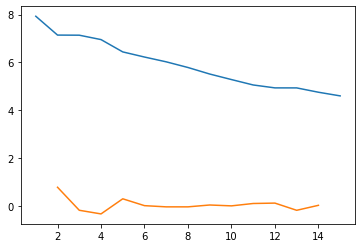

In [10]:
complete.elbow_plot(15)

In [11]:
complete.elbow_point()

2

In [12]:
data_scaled['complete_cluster'] = complete.create_cluster(6.2)

In [13]:
data_scaled.groupby('complete_cluster').mean()

,PC1,PC2,PC3,PC4,PC5,PC6
complete_cluster,,,,,,
1,0.864349,-0.004116,-0.443697,1.437553,-0.036896,0.998364
2,2.228614,0.129981,-0.861774,-1.805849,0.863161,0.753117
3,-0.901822,0.325979,1.485206,0.102489,2.277671,1.132052
4,0.270314,-0.357503,-0.231909,-0.058724,0.784129,-0.487148
5,-0.560585,1.562151,-0.351803,0.174739,-0.090745,-0.981589
6,-0.284163,-0.671631,0.108857,1.195192,-0.322703,-1.059634
7,-0.268550,-0.111830,0.224644,-0.278956,-0.487347,0.163015


In [14]:
data_scaled['complete_cluster'].value_counts()

7    190
4     84
1     39
5     36
6     15
2     13
3     11
Name: complete_cluster, dtype: int64

# Single

0.6020197583277606


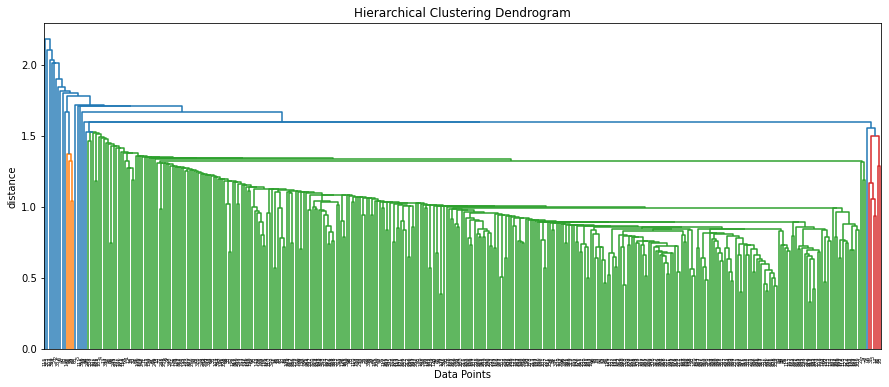

In [15]:
single = Cluster(num_data_scaled, 'single')
print(single.cophenet_value())
single.dendrogram_plot()

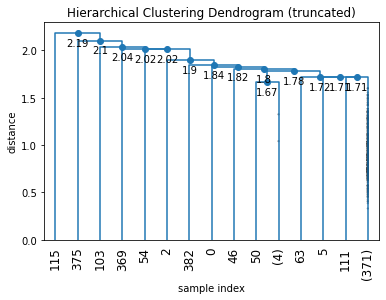

In [16]:
single.dendrogram_truncated(15)

In [17]:
single.inconsistency()

array([[1.62145461e+00, 4.10952158e-02, 3.00000000e+00, 1.15464671e+00],
       [1.45543137e+00, 1.86878626e-01, 3.00000000e+00, 1.14388217e+00],
       [1.65977432e+00, 5.76278468e-02, 3.00000000e+00, 9.11319484e-01],
       [1.69860711e+00, 2.57491522e-02, 3.00000000e+00, 6.22057174e-01],
       [1.71493722e+00, 2.81490237e-03, 3.00000000e+00, 1.05090002e+00],
       [1.65133972e+00, 1.60016681e-01, 5.00000000e+00, 8.09736821e-01],
       [1.74263805e+00, 6.07165461e-02, 4.00000000e+00, 9.86701807e-01],
       [1.80110893e+00, 1.95184756e-02, 3.00000000e+00, 9.61118704e-01],
       [1.82243361e+00, 2.12852360e-02, 3.00000000e+00, 1.05479462e+00],
       [1.85447050e+00, 4.02597661e-02, 3.00000000e+00, 1.09755567e+00],
       [1.91973497e+00, 8.73175724e-02, 3.00000000e+00, 1.09859835e+00],
       [1.97691612e+00, 6.77747435e-02, 3.00000000e+00, 5.82997206e-01],
       [2.02311842e+00, 1.22570819e-02, 3.00000000e+00, 1.15413566e+00],
       [2.05194918e+00, 4.47095330e-02, 3.00000000e

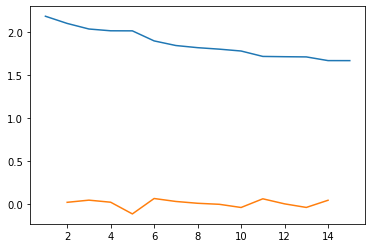

6


In [18]:
single.elbow_plot(15)
print(single.elbow_point())

# Average

0.6180702726571954


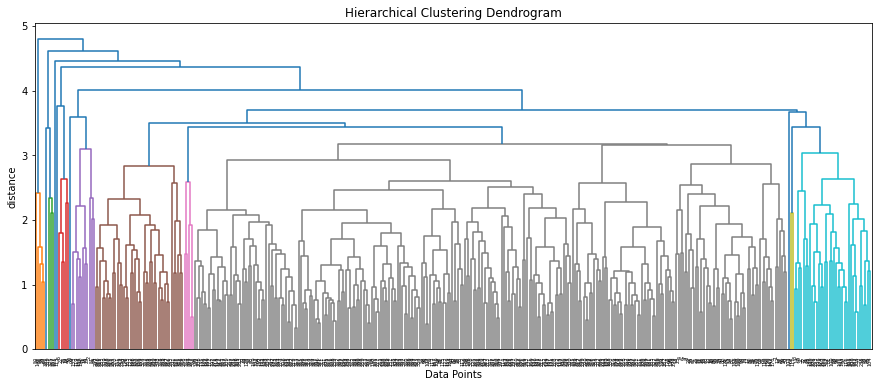

In [19]:
average = Cluster(num_data_scaled, 'average')
print(average.cophenet_value())
average.dendrogram_plot()

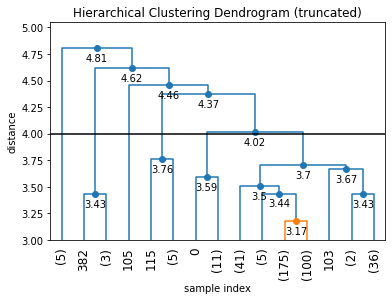

In [20]:
average.dendrogram_truncated(15, 3, 4)

In [21]:
average.inconsistency()

array([[2.59041393, 0.33525336, 7.        , 1.68947065],
       [2.77906727, 0.36174023, 7.        , 1.0878897 ],
       [2.6241445 , 0.70598183, 3.        , 1.13779624],
       [2.73101284, 0.51676595, 5.        , 1.35652586],
       [2.66546456, 0.72619847, 7.        , 1.06002308],
       [2.91849329, 0.45884171, 7.        , 1.27285439],
       [2.81004713, 0.64972047, 4.        , 1.19985543],
       [3.05973352, 0.68973841, 4.        , 0.88211621],
       [3.42983751, 0.31048969, 6.        , 0.87059356],
       [2.61463078, 0.83674949, 4.        , 1.3710434 ],
       [3.59531882, 0.30012641, 6.        , 1.39914955],
       [3.67882802, 0.58397554, 6.        , 1.18932028],
       [4.15141944, 0.32242032, 4.        , 0.94226429],
       [3.84390057, 0.95967711, 5.        , 0.80937262],
       [3.55138232, 1.32178116, 6.        , 0.95024562]])

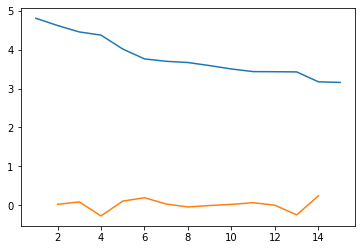

14


In [22]:
average.elbow_plot(15)
print(average.elbow_point())

In [23]:
data_scaled['average_cluster'] = average.create_cluster(4)

In [24]:
data_scaled.groupby('average_cluster').mean()

,PC1,PC2,PC3,PC4,PC5,PC6,complete_cluster
average_cluster,,,,,,,
1,2.782956,1.109437,-0.492152,-1.739708,0.274362,1.948992,2.000000
2,0.397471,-1.544269,-1.286324,1.674234,0.457262,2.375734,1.000000
3,-0.729206,1.118777,1.461086,0.092066,2.296239,1.203069,3.666667
4,-0.623373,1.566513,-1.553582,-0.234920,-1.525245,-0.418621,6.166667
5,-0.009056,-0.070490,0.043777,0.018447,0.010156,-0.061823,5.325000
6,-0.388871,0.495462,1.722669,-2.372609,-2.331495,0.813254,7.000000


In [25]:
data_scaled['average_cluster'].value_counts()

5    360
4     12
3      6
1      5
2      4
6      1
Name: average_cluster, dtype: int64

# Ward

0.4488817149069319


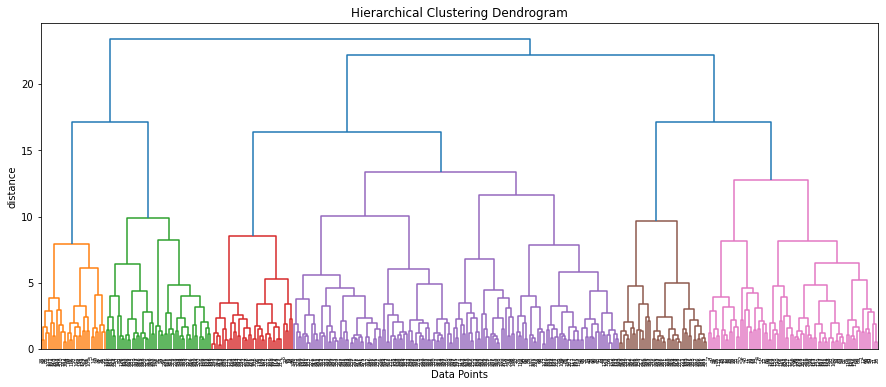

In [26]:
ward = Cluster(num_data_scaled, 'ward')
print(ward.cophenet_value())
ward.dendrogram_plot()

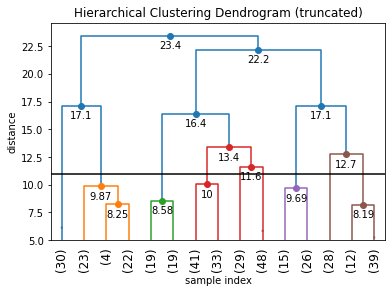

In [27]:
ward.dendrogram_truncated(15, 5, 11)

In [28]:
ward.inconsistency()

array([[ 4.17061566,  1.94170331,  7.        ,  2.03937949],
       [ 5.06286774,  1.94978054,  7.        ,  1.60169889],
       [ 3.81761099,  2.53566601,  6.        ,  1.74973821],
       [ 4.16263264,  2.16016369,  7.        ,  2.04307949],
       [ 4.34943889,  2.60019622,  7.        ,  2.05360004],
       [ 5.64911721,  2.75132582,  7.        ,  1.53572186],
       [ 5.49038678,  2.21639691,  7.        ,  2.05705648],
       [ 6.30309377,  2.8172718 ,  7.        ,  1.88742646],
       [ 6.9913869 ,  3.0475671 ,  7.        ,  1.88957101],
       [ 8.76678889,  2.97601345,  7.        ,  1.55041609],
       [ 9.83402875,  4.5005132 ,  7.        ,  1.46355186],
       [ 8.51518272,  4.24237115,  7.        ,  2.02643557],
       [ 9.38416473,  4.37756576,  7.        ,  1.77270252],
       [14.30827507,  4.69428371,  7.        ,  1.68045885],
       [16.30831357,  5.74332304,  7.        ,  1.24227672]])

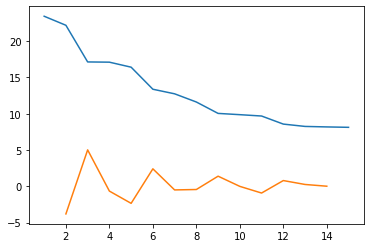

3


In [29]:
ward.elbow_plot(15)
print(ward.elbow_point())

In [30]:
data_scaled['ward_cluster'] = ward.create_cluster(11)

In [31]:
data_scaled.groupby('ward_cluster').mean()

,PC1,PC2,PC3,PC4,PC5,PC6,complete_cluster,average_cluster
ward_cluster,,,,,,,,
1,1.433221,0.807738,0.314100,1.694060,-0.028986,0.262235,3.033333,5.000000
2,1.663214,-0.162279,-0.488651,-0.639146,0.611367,-0.351145,3.591837,4.591837
3,-0.808923,-0.312480,0.847472,0.064804,1.420500,0.276753,4.342105,4.736842
4,-0.128419,-0.826776,0.076218,-0.416456,-0.410465,-0.562012,6.581081,5.000000
5,0.056759,-0.445815,1.037910,-0.165740,-1.033660,1.061367,6.172414,4.862069
6,-0.171756,0.369630,1.099699,-0.045119,-0.188547,-0.450279,6.166667,5.000000
7,-0.471060,-0.819563,-1.350117,0.818689,0.006772,0.499706,3.926829,4.780488
8,-0.719421,1.742392,-0.761756,0.142731,0.000768,-0.985747,5.142857,4.750000
9,-0.748950,0.721111,-0.578905,-0.426254,-0.273819,0.752118,6.568627,4.901961


In [32]:
data_scaled['ward_cluster'].value_counts()

4    74
9    51
2    49
6    48
7    41
3    38
1    30
5    29
8    28
Name: ward_cluster, dtype: int64

In [33]:
data_scaled = data_scaled[['PLAYER', 'TEAM', 'POSITION', 'ward_cluster', 'PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6']]
data_scaled.rename({'ward_cluster' : 'CLUSTER'}, axis = 1, inplace = True)
data_scaled.to_csv('Data/Clustered_Data.csv', index = False)